# Problem Set 2

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

In [1]:
import pandas as pd
import numpy as np
import IPython
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import ttest_ind
import statsmodels as sm
import statsmodels.formula.api as smf

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [2]:
# Data pre-processing
progresa = pd.read_csv("progresa_sample/progresa_sample.csv")
print(progresa.shape)
print('progresa data shape: ' ,progresa.shape[0],'rows', progresa.shape[1],'columns')

# Replacing non-numeric values in binary columns 

progresa1 = progresa #create copy of data

# for "poor" column assign pobre = 1, no pobre = 0
progresa1["poor"] = progresa1["poor"].replace(["pobre", "no pobre"], [1, 0])

# for "treatment" column: basal = 1, treatment = 0 
progresa1["progresa"] = progresa1["progresa"].replace(["basal", "0"], [1, 0])

# Display head 
progresa1.head()

(77250, 21)
progresa data shape:  77250 rows 21 columns


,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0


In [3]:
#  summary statistics (mean and standard deviation) for all of the demographic variables in the dataset
#dropping year,village and folnum columns 
progresa_sub = progresa1.drop(progresa.columns[[0, 17, 18]], axis=1)
progresa_sub = progresa_sub.reindex(sorted(progresa_sub.columns), axis=1)
summary = progresa_sub.describe()
summary = summary[1:3].T
summary 

,mean,std
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [4]:
# creating data subset, poor for the year of 1997
poor_97 = progresa1[(progresa1['year'] == 97 )& (progresa1['poor']== 1) ]
# drop the year and poor columns 
poor_97 = poor_97.drop(['year','poor'], axis=1) 
poor_97  = poor_97.reindex(sorted(poor_97.columns), axis=1)                                     
poor_97.columns


Index(['age', 'dist_cap', 'dist_sec', 'fam_n', 'folnum', 'grc', 'grc97',
       'hohage', 'hohedu', 'hohsex', 'hohwag', 'indig', 'min_dist', 'progresa',
       'sc', 'sc97', 'sex', 'village', 'welfare_index'],
      dtype='object')

In [5]:
#creating treated and control group and drop columns that are not relevant 
treat_97 = poor_97[poor_97['progresa']== 1].drop([ 'folnum','village' ,'progresa'], axis = 1)
control_97 = poor_97[poor_97['progresa']== 0].drop([ 'folnum','village' ,'progresa'], axis = 1)
print('treated group shape: ',treat_97.shape,', Control group shape: ' ,control_97.shape)
#treat_97.columns
# creating average for  treated and control groups
Avg_treat_97 = treat_97.mean()
Avg_control_97 = control_97.mean()

# # Calculating p values for all  relevant variables
p_vals_list = []
for ii in Avg_treat_97.index:
    x = treat_97[ii].dropna()
    y=  control_97[ii].dropna()
    t, p = ttest_ind(x,y)
    p_vals_list.append(p)

treated group shape:  (20222, 16) , Control group shape:  (12474, 16)


In [6]:
## Summary Statistics data table using new dataframe
sum_stats_97 = pd.DataFrame({"Average value (Treatment Villages)": Avg_treat_97,
                              "Average value (Control villages)": Avg_control_97, 
                              "Difference (Treat - Control)": Avg_treat_97 - Avg_control_97,
                              "p-values": p_vals_list})
# creating column with index values and renaming column "Variable name"
sum_stats_97.sort_index(inplace = True) 
sum_stats_97.index.name = "Variable Name" 
sum_stats_97

,Average value (Treatment Villages),Average value (Control villages),Difference (Treat - Control),p-values
Variable Name,,,,
age,10.716991,10.742023,-0.025032,4.785594e-01
dist_cap,150.829074,153.769730,-2.940656,8.415005e-04
dist_sec,2.453122,2.507662,-0.054540,3.569843e-02
fam_n,7.281327,7.302469,-0.021142,4.271039e-01
grc,3.531599,3.543050,-0.011450,6.890151e-01
grc97,3.531599,3.543050,-0.011450,6.890151e-01
hohage,43.648828,44.276918,-0.628090,1.796243e-06
hohedu,2.663139,2.590348,0.072791,1.105093e-02
hohsex,0.924656,0.922947,0.001709,5.711858e-01


In [7]:
sum_stats_97['p-values' ]<0.05

Variable Name
age              False
dist_cap          True
dist_sec          True
fam_n            False
grc              False
grc97            False
hohage            True
hohedu            True
hohsex           False
hohwag            True
indig            False
min_dist          True
sc               False
sc97             False
sex               True
welfare_index     True
Name: p-values, dtype: bool

### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

Results discussion
A: Using a significance level of 95% to test our hypothesis of identical means for the two populations samples, we observe that  p-value < 0.05 for all relevant variables.This tells us that there are  statistical differences between the treatment and control groups at the baseline because the p-values for all the variables are less than 5% listed below

- dist_cap
- dist_sec
- hohage 
- hohedu
- hohwag
- min_dist
- sex
- welfare_index 

B: It matters that if there are differences at the baseline because inherent different before treatments may mean that an observed changes after treatment is administered may not be fully attributed to our treatment. These differences also imply that the populations may have not been selected in a completely random manner. As such, resulting change in outcomes for both populations may be solely attributed inthe case as the population is inherently different from start leading to wrong analysis.

C: This implies that we want no difference at the baseline so that future observed changes are solely a result of administered treatment.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

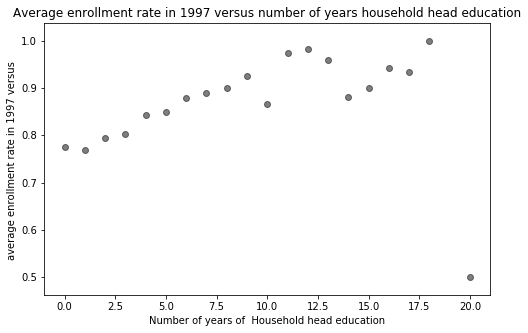

In [8]:
# Your code here
full_data_97 = progresa1[progresa1['year'] == 97]
# Average enrollment rates in 1997
hohedu_group_mean = full_data_97.groupby(['hohedu'],as_index=False).mean()
hohedu_group_mean.reset_index(inplace=True)

## plot average enrollment rate in 1997 versus  level of household head education
plt.figure(figsize = (8, 5)) # set figure size
#create scatter plot
plt.scatter(hohedu_group_mean['hohedu'],hohedu_group_mean['sc'], c = 'k',alpha=0.5)
#set axes labels and title
plt.title('Average enrollment rate in 1997 versus number of years household head education')
plt.xlabel('Number of years of  Household head education')
plt.ylabel("average enrollment rate in 1997 versus ");

Discussing Plot:

from the figure, we see that there is a positive correlation between Average enrollment rate and level of household head education. We see that house hold heads that have higher education tend to on average have a higher fraction of children enrolled. We can also observe that there as some discrepancies in the increasing trend for where household heads with 10 and 20 years education levels are no exactly following our pattern. More so, we see that the average enrollment rate for families where household head's level of education is 20years is the lowest value across all observations (0.5), which is counterintuitive following the increasing trend. This may indicate further data exploration and analysis is needed.

### 1.5 Graphical exploration, part 2

Visualize the distribution of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

In [9]:
# Calculating enrollment rates among poor households in treated villages before and after treatment  
data_97 = progresa1[(progresa1['year'] == 97 )& (progresa1['poor']== 1)]
data_98 = progresa1[(progresa1['year'] == 98 )& (progresa1['poor']== 1)]


# group the data by village for both pre and post treatment for treatment group
treatv_97 = data_97[data_97['progresa'] == 1].groupby(['village'] ).mean()
treatv_98 = data_98[data_98['progresa'] == 1].groupby(['village'] ).mean()

## calculating average enrollment rates for both groups

treat_97 = treatv_97['sc'].mean()
treat_98 = treatv_98['sc'].mean() 
#difference between pre and post treatments
Difference  = treat_98 - treat_97


# Using ttest on two groups

t, p = ttest_ind(treatv_97["sc"], treatv_98["sc"])
ttest_result = pd.DataFrame({"Mean Treatment 98":treat_98,
                             "Mean Treatment 97":treat_97,
                             "Difference": Difference,
                             "T-Test Value": t,
                         "p-value": p}, 
                         index = ["Independent Samples "])

# Output printed values
print("The average enrollment rate (Pre-treatment, 1997):", treat_97)
print("The average enrollment rate (Post-treatment, 1998):", treat_98)
print("Difference between pre and post treatments [%]:", Difference)
display(ttest_result)

The average enrollment rate (Pre-treatment, 1997): 0.8138394110596501
The average enrollment rate (Post-treatment, 1998): 0.8295362042630732
Difference between pre and post treatments [%]: 0.0156967932034231


,Mean Treatment 98,Mean Treatment 97,Difference,T-Test Value,p-value
Independent Samples,0.829536,0.813839,0.015697,-2.015713,0.044249


Text(0.5, 1.0, 'Histogram for Average Enrollment rate in 1998')

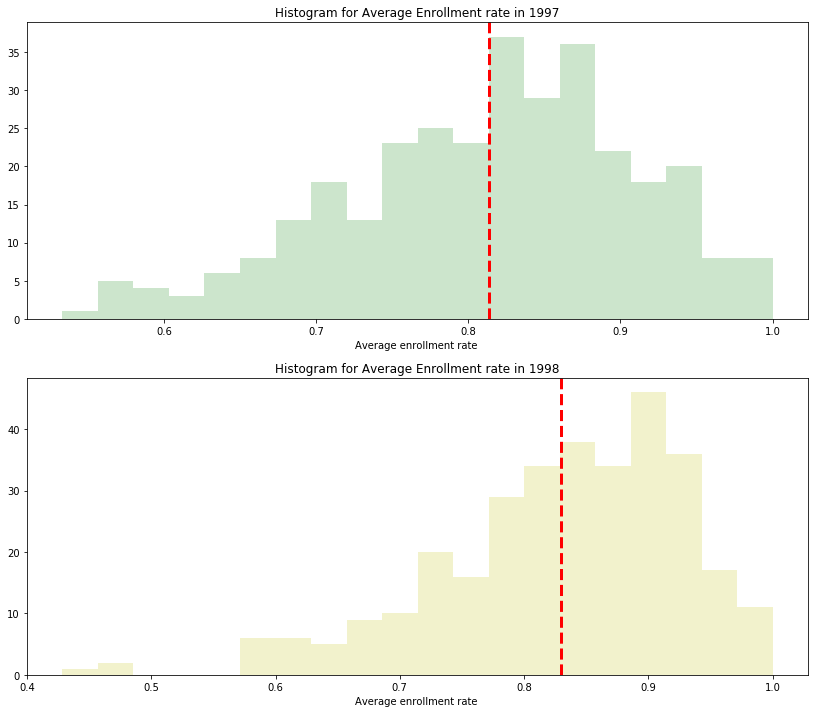

In [10]:
## plotting histograms for treated in 97 versus treated in 98
# specifying figure size and axes
fig, ax = plt.subplots(nrows=2, ncols=1,figsize =(14,12))
# plotting histograms on 2 subplots vertical stack
ax[0].hist(treatv_97['sc'], bins= 20,color = 'green',alpha = 0.2);
ax[0].axvline(treat_97, color='r', linestyle='dashed', linewidth=3)
ax[0].set_xlabel('Average enrollment rate ')
ax[0].set_title('Histogram for Average Enrollment rate in 1997')
#ax[0].set_xlim(0,18,1)
ax[1].hist(treatv_98['sc'], bins= 20,color = 'y', alpha = 0.2);
ax[1].axvline(treat_98, color='r', linestyle='dashed', linewidth=3)
ax[1].set_xlabel('Average enrollment rate ')
ax[1].set_title('Histogram for Average Enrollment rate in 1998')
#ax[1].set_xlim(0,18,1);

## Discussing difference between 2 histograms ( Average enrollment rate 1997 vs 1998)
### Does there appear to be a difference? 
The 2 data sets follow different disctribution with enrollment rates in 1997 more centered around its mean values while enrollment rates in 1998 are more skewed to the right. with Pre-treatment average enrollment rate values at .81 and Post-treatment average enrollment rate at about 0.82,  leading to From the plot we notice that the results between the 2 histograms are very similar. a slight increase of 0.01. It is hard to assess from this change if the difference is significant

### Is this difference statistically significant?
With a 95% confidence level, our ttest results show us that the pre and post-treatment difference between the mean average rate of enrollments for villages aresignificant since our value is less than 5% indicating that the null hypothesis that the 2 means are the same has been rejected.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive the PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [11]:
#poor, treated group 1998
treatp_98 = progresa1[(progresa1["poor"] == 1) & (progresa1["year"] == 98) & (progresa1["progresa"] == 1)]
#poor control group 1998
controlp_98 = progresa1[(progresa1["poor"] == 1) & (progresa1["year"] == 98) & (progresa1["progresa"] == 0)]

## calculating average enrollment rates for both groups

mean_tc_98 = controlp_98['sc'].mean()
mean_tp_98 = treatp_98['sc'].mean() 
#difference between pre and post treatments
diff_t_98 = mean_tp_98  - mean_tc_98 


# Using ttest on two groups

t, p = ttest_ind(treatp_98["sc"].dropna(), controlp_98["sc"].dropna())
ttest_result1 = pd.DataFrame({"Mean Treatment":mean_tc_98,
                         "Mean Control": mean_tc_98,
                         "Difference": diff_t_98,
                         "T-Test Value": t,
                         "p-value": p}, 
                         index = ["Independent Samples"])

# Output printed values
print("The average enrollment rate (Treatment group, 1998):", mean_tp_98)
print("The average enrollment rate (Control group, 1998):", mean_tc_98)
print("Difference between pre and post treatments [%]:", diff_t_98 )
display(ttest_result1)


The average enrollment rate (Treatment group, 1998): 0.8464791213954308
The average enrollment rate (Control group, 1998): 0.807636956730308
Difference between pre and post treatments [%]: 0.0388421646651228


,Mean Treatment,Mean Control,Difference,T-Test Value,p-value
Independent Samples,0.807637,0.807637,0.038842,8.358721,6.636344e-17


### Results dicussion:
The difference is statistically significant we notice that the p-value obtained from the independent samples  ttest  is < 0.05, allowing us to reject the identical means null hypothesis at a 95% significance level. Since the p-value is a very small number (6.633e-17), we can also reject the null hypothesis for a 99% significance level. Therefore, we can conclude/interpret that there exists a significant difference between the average enrollment rate for both control and treated villages inside the Progresa program, leading to higher average enrollment rates in those villages where the program is applied (treated villages, more kids enrolled in schools).

From the simple difference analysis, we conclude that the treated villages have a higher average rate of enrollment than those villages who were not part of the Progresa program.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [15]:

# Extracting data for the poor treated group in 1998 (post treatment)
Treat_98 = progresa1[(progresa1["poor"] == 1) & (progresa1["year"] == 98)]

# Regressing 1998 enrollment rates of the poor on treatment assignment post treatment (1998)
Reg_model = smf.ols(formula = 'sc ~ progresa', data = Treat_98).fit()

# Display Summary results
display(Reg_model.summary())

# Display Standard error
Reg_model.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Mon, 10 Feb 2020   Prob (F-statistic):           6.64e-17
Time:                        08:31:33   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8076      0.004    220.676      0.000       0.800       0.815
progresa       0.0388      0.005      8.359      0.000       0.030       0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Intercept    0.003660
progresa     0.004647
dtype: float64

### Results discussion
#### Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? 
From the coefficient for Progresa is 0.0388 in our results table , we can conclude that Progresa increases the likelihood of a child getting enrolled in a school by 0.0388 times. Hence, this means that for a unit increase in Progresa variable, the average enrollment would increase by by a fraction of 0.0388. 
#### How does your regression estimate compare to your t-test estimate from part 2.1?
We notice that  the intercept coefficient  is exactly the same value as the coefficient value for the control group we obtained in the T-test estimated in part 2.1. Since in the regression we are computing  coefficients as the difference between the observed value and the mean values thus we can see that we are approximately estimate computation oin 2.1.

further note that if treatment variable in our regression is 1, we obtain the following equation
 0.8076 (Mean control/intercep) + 1 x 0.3884 (Means' difference/slope) = 0.8464 ( which corresponds to the second coefficient in 2.1. 
#### Based on this regression model, can we reject the null hypothesis that the treatment effects are zero?
We observe that the p-value is <<< 0.05. This means that the probability of having the same enrollment rates between treated and control group is <0.05. Hence, at a 95% significance level, we can indicate that the values obtained for the enrollment rates depend on the Progresa treatment effect and not by a random success. Based on these results obtained we can reject the null hypothesis of zero treatment effects (Progresa program) in our model.


#### What is the counterfactual assumption underlying this regression?
If the absence of  treatment, then the average enrollment rates for the treated group would have been 0.8076, the same as that of the control group.


### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [16]:
# Extracting data for the poor treated group in 1998 (post treatment)
Treat_98 = progresa1[(progresa1["poor"] == 1) & (progresa1["year"] == 98)]

# Regressing 1998 enrollment rates of the poor on treatment assignment post treatment (1998)
Multi_reg_model = smf.ols(formula = 'sc ~  progresa + age + dist_cap + dist_sec + fam_n + hohage + hohedu + \
      hohwag + indig + min_dist + sex + welfare_index', data = Treat_98).fit()

# Display Summary results 
display(Multi_reg_model.summary())

# Display Standard error
Multi_reg_model.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     849.5
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        08:31:33   Log-Likelihood:                -7541.1
No. Observations:               27263   AIC:                         1.511e+04
Df Residuals:                   27250   BIC:                         1.521e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4431      0.018     80.855      0.000       1.408       1.478
progresa          0.0337      0.004      8.418      0.000       0.026       0.042
age              -0.0657      0.001    -94.750      0.000      -0.067      -0.064
dist_cap          0.0002    3.7e-05      5.512      0.000       0.000       0.000
dist_sec         -0.0106      0.001    -12.012      0.000      -0.012      -0.009
fam_n             0.0006      0.001      0.727      0.467      -0.001       0.002
hohage        -2.299e-05      0.000     -0.118      0.906      -0.000       0.000
hohedu            0.0079      0.001      9.224      0.000       0.006       0.010
hohwag         -7.23e-07   2.81e-06     -0.257      0.797   -6.24e-06    4.79e-06
indig             0.0188      0.005      3.961      0.000       0.009       0.028
min_dist          0.0004   6.34e-05      6.326      0.000       0.000       0.001
sex               0.0304      0.004      7.847      0.000       0.023       0.038
welfare_index  2.283e-05   1.82e-05      1.253      0.210   -1.29e-05    5.85e-05
==============================================================================
Omnibus:                     2940.375   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3992.254
Skew:                          -0.930   Prob(JB):                         0.00
Kurtosis:                       3.237   Cond. No.                     9.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Intercept        0.017848
progresa         0.004005
age              0.000693
dist_cap         0.000037
dist_sec         0.000885
fam_n            0.000880
hohage           0.000195
hohedu           0.000857
hohwag           0.000003
indig            0.004734
min_dist         0.000063
sex              0.003869
welfare_index    0.000018
dtype: float64

### Results Discussion

#### How do the controls affect the point estimate of treatment effect?
We notice from our model that inclides contol variables that the estimate of treatment effect has changed. In fact we can see that its value has decreased from  0.0388 in the previous model (2.2) to a value of 0.0337. Although it is not a very significant change, we can still appreciate some differences between both models.These results could highlight the fact that the treatment variable $progresa$ was over-estimating the treatment effect in the original model, by including the impact/effect of other control variables. After adding these control variables, part of the treatment effect can be explained by their presence, leading to a reduction in the coefficient of the current treatment variable $progresa$.

There is significant difference in the intercept coefficient from an original value of 0.8076 to a new value of 1.4431. In addition, other coefficients (such as $age$ or $sex$) are statistically significant (null hypothesis is rejected with a p-value = 0) although their magnitude is not significantly large.


#### How do the controls affect the standard error on the treatment effect?
Introducing control variables to the model has improved the value of the standard error on the treatment effectà from 0.005 to 0.004. This means that the accuracy of the prediction performed by the model has been improved, thus we hcan have sharper prediction of treatment effects.


#### How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
In general, The R-squared value obtained by this new model, 0.272 is better than the R-squared value, 0.003 obtained  in the previous simple regression model in 2.2.These results show that this new regression model explains about 27% of the variability of the response data around its mean, in comparison to the 0.3% of the previous model.

Below I discuss values of variables with significant coefficients.

$age$: with a negative coefficient (-0.0657), indicates decrease the average enrollment rate by 0.0657 units as the child's age increases by one year (assuming no other factors change).

$dist\_sec$:  with negative coefficient (-0.0106), indicates  decrease in units of the average enrollment rate by  0.0106 units for every extra mile away from the school is from the village.

$dist\_cap$: with a slightly positive  coefficient (0.0002) indicates an increease in the average enrollment rate by 0.0002 units when the families are located one mile away from the capital. this variable will have little inpact on the regression model since its coefficient is very small. 

$hohedu$: with a positive coefficient, (0.0079), indicates an increase in average enrollment rate by 0.0079 with increase in  the number of years of education of the household head, confirming our previous thoughts regarding the positive correlation between these two variables from 1.4.

$indig$: with a positive coefficient, (0.0188),  indicates an increase in average enrollment rate by 0.0188 when the family consists of native people (indigenous).

$min\_dist$: similar to the $dist\_cap$ variable, we have a very small impact on the model as the magnitude of the coefficient, (0.0004), is very small. Still, we can say that increasing the minimum distance to an urban center leads to an increase in the average enrollment rate. 

$sex$: with a positive coefficient (0.0304), indicates an increase in average enrollment rates by 0.0304 unitsfor male 
children. Thus, assuming a totally randomized experiment,a child's gender impacts the average enrollment rate achieved.

Conclusively, the treatment variable $progresa$, it is still the most relevant variable for explaining the average school enrollment rates, seven with a slight reduction in its magnitude from 0.0388 (simple regression) to 0.0337 (multiple regression).we can hypothesize that older students and students who live further from school are less likely to enroll into school. In addition, male children, and children that live close to the capital and urban centers are more likes to be enrolled. We also see that households with their heads having higher levels of education are more to have their children enrolled. All these assuming  the experiment was performed on a random sample(randomized trial), the researcher can establish causal relationship analysis. Also, The set of control variables affects the model significantly. Due to the lower standard error value for the multiple regression results, we know that the accuracy of the model has improved, thus obtaining a better model for representing and analyzing the current data set.


### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [17]:
#Extracting poor households in treated villages before(1997) and after(1998) treatment  
data_97 = progresa1[(progresa1['year'] == 97 )& (progresa1['poor']== 1)]
data_98 = progresa1[(progresa1['year'] == 98 )& (progresa1['poor']== 1)]

# Poor treated group, pre-treatment (1997)
treatp_97  = data_97[data_97["progresa"] == 1]

# Poor treated group, post-treatment (1998)
treatp_98  = data_98[data_98["progresa"] == 1]

# Poor control group, pre-treatment (1997)
treatc_97  = data_97[data_97["progresa"] == 0]

# Poor control group, post-treatment (1998)
treatc_98  = data_98[data_98["progresa"] == 0]


# Differences
control_diff = treatc_98.mean()["sc"] - treatc_97.mean()["sc"]
treat_diff = treatp_98.mean()["sc"] - treatp_97.mean()["sc"]
diff_in_diff = treat_diff - control_diff

# Create a DataFrame and display it
DinD = pd.DataFrame({"Pre-Treatment": [treatc_97.mean()["sc"], treatp_97.mean()["sc"], 
                                         treatp_97.mean()["sc"] - treatc_97.mean()["sc"], "-"],
                       "Post-Treatment": [treatc_98.mean()["sc"], treatp_98.mean()["sc"], 
                                         treatp_98.mean()["sc"] - treatc_98.mean()["sc"], "-"],
                       "Diff in Diff": ["-", "-", "-", diff_in_diff]},
                       index = ["Control", "Treatment", "Difference", "Diff in Diff"])
print(DinD)

             Pre-Treatment Post-Treatment Diff in Diff
Control           0.815186       0.807637            -
Treatment         0.822697       0.846479            -
Difference      0.00751088      0.0388422            -
Diff in Diff             -              -    0.0313313


### Results Discussion

#### What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
From the difference-in-differences analysis, we estimated the treatment impact at 0.0313, while in the simple difference approach when using the basic one variable linear regression model  we estimated a value of 0.0388 and int the multiple variable linear regression model our impact estimate was 0.0337. We note that the difference-in-differences approach due to has enabled us to reduce the over-estimation of our previous models by including effects of possible time trends.

#### What is the counterfactual assumption underlying this estimate?
 in the absence of treatment, the  enrollment rates in the treatment group would have been exactly the same as the rate of enrollment for the control group (assuming parallel trends)

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [18]:
# Make a copy of data and convert years to (0,1) binary where : 97 = 0, 98 = 1
progresa2 = pd.DataFrame.copy(progresa1)
progresa2["year"] = progresa2["year"].replace([97, 98], [0, 1])

# select the poor group for the complete data set 
poor_fulldata = progresa2[progresa2["poor"] == 1]

# Regression model: Diff in Diff model
# between the treatment and the binarized year (period)
DinD_Model = smf.ols(formula = 
'sc ~ progresa + age + dist_cap + dist_sec + fam_n + hohage + hohedu + \
      hohwag + indig + min_dist + sex + year + welfare_index + progresa*year', 
                    data = poor_fulldata)
DinD_Model_fit = DinD_Model.fit()

# Display Summary
display(DinD_Model_fit.summary())

# Standard error
DinD_Model_fit.bse

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     1634.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        08:31:34   Log-Likelihood:                -16476.
No. Observations:               58005   AIC:                         3.298e+04
Df Residuals:                   57990   BIC:                         3.312e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4111      0.012    114.216      0.000       1.387       1.435
progresa          0.0033      0.004      0.859      0.390      -0.004       0.011
age              -0.0658      0.000   -143.065      0.000      -0.067      -0.065
dist_cap          0.0002   2.55e-05      7.235      0.000       0.000       0.000
dist_sec         -0.0096      0.001    -15.459      0.000      -0.011      -0.008
fam_n             0.0001      0.001      0.208      0.835      -0.001       0.001
hohage            0.0002      0.000      1.711      0.087   -3.36e-05       0.000
hohedu            0.0072      0.001     12.158      0.000       0.006       0.008
hohwag         1.055e-06   1.93e-06      0.547      0.585   -2.73e-06    4.84e-06
indig             0.0242      0.003      7.407      0.000       0.018       0.031
min_dist          0.0004   4.39e-05      8.607      0.000       0.000       0.000
sex               0.0332      0.003     12.420      0.000       0.028       0.038
year              0.0280      0.004      6.429      0.000       0.019       0.037
welfare_index  2.013e-05   1.26e-05      1.599      0.110   -4.54e-06    4.48e-05
progresa:year     0.0308      0.006      5.583      0.000       0.020       0.042
==============================================================================
Omnibus:                     5460.754   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7170.195
Skew:                          -0.859   Prob(JB):                         0.00
Kurtosis:                       3.110   Cond. No.                     9.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Intercept        0.012355
progresa         0.003788
age              0.000460
dist_cap         0.000026
dist_sec         0.000624
fam_n            0.000603
hohage           0.000135
hohedu           0.000593
hohwag           0.000002
indig            0.003272
min_dist         0.000044
sex              0.002672
year             0.004352
welfare_index    0.000013
progresa:year    0.005513
dtype: float64

### Results Discussion

#### What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.

We introduce the interaction effect between the binarized $progresa$ and $year$ variables in order to implement the difference-in-differences approach using a regression model. The $year$ variable is binarized pre and post treatment ( pre =0, post =1).  We also included a number of control variables including the $year$. 

$progresa$: Its coefficient decreases to 0.0033 from the previous 0.0388 (simple one variable regression) and the 0.0337 (multiple variable regression). In addition, we note that the associated p-value is > 0.05 and thus, the coefficient is no longer statistically significant for the regression model since we are unable to reject the null hypothesis. More so, the accuracy of our prediction has reduced as we can see that the standard error of our coeffifient increases significantly from 0.004647 (one variable regression) and (multiple variables regression) 0.004005 to 0.39.

$year$: We discuss the variable $year$ in order to be able to develop a deeper analysis of the Progresa treatment impact via the difference-in-differences regression approach. We note that the estimated coefficient (0.0280) for this variable is statistically significant (p-value < 0.05), indicating that for the year 1998, the average enrollment rate from 1997 to 1998 by  0.028.

$progresa*year$: We use the interaction between $progresa$ and $year$ variables to estimate the impact of the Progresa program.  We observe that the value of its  coefficient is equal to 0.0308, measured in rate of enrollment over time. This coefficient indicates that for households included in the  Progresa subsidy program, in 1998 the average enrollment rate for their children would increase by 0.0308. We also note that the associated p-value of the coefficient in < 0.05 (in fact < 0.01), allowing us to reject the null hypothesis of a zero coefficient and therefore, we can say with a 95% of significance that the coefficient is not null.

From this analysis,  we see that $progresa$ variable is no longer useful for the regression model as its coefficient is not statistically significant. Also, we identify some positive effects in relation to the $year$ variable and the interaction of $progresa*year$. Thus, our estimate of the impact of Progresa following the current methodology is  0.0308 measured in rate of enrollment/time with standard error: 0.005513.

#### How do these estimates of the treatment effect compare to the estimates based on the simple difference?

We observe that the impact estimation is lower in the current implementation than it used to be in 2.2 and 2.4. This can be measure by the coefficient of the $progresa$ variable: decreasing from 0.0388 to 0.0337, and finally to the current 0.0033. The drop in treatment impact could be explained by the fact that we were over-estimating the impact of this variable in the previous models because we were not including all the relevant control variables and interactions.

In the simple difference model, $progresa$ variable was statistically significant (p-value < 0.05) but now using the difference-in-differences method, it is no longer statistically significant (p-value > 0.05). 
Now, if we observe the relevant coefficient for measuring impact of treatment, that is the coefficient associated with the interaction $progresa*year$ (difference-in-differences impact), we note that the impact estimation is lower in comparison to the previous models: from 0.0388 and 0.0337 ( in 2.2 and 2.3), the current impact effect decreases up to 0.0308. The explanation of this pattern follows the same logic as we mentioned in the first point. As we said above, the p-value for this coefficient allows us to reject the null hypothesis of a null coefficient.On the other hand, we notice that p-values associated with the rest of the control variables tend to be approximately similar to the ones obtained before.


#### How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
Comparing results in 2.4 and 2.5, we see  a 0.0313 value (tabular estimation) and a 0.0308 value (regression estimation) indicating that the impact of the interaction variable has slightly decreased due to the addition of extra control variables. This decrease resulted from a reduction in the over-estimation performed by the tabular difference-in-differences model. This slight difference is clearly explained by the fact that we introduced extra terms to our model, including the time ($years$) consideration and the interaction between $years$ and the $progresa$ treatment. 

Based on the  model structure, the impact of the treatment in the year 1998 for the treated group should be measured as the sum coefficients of three variables: $progresa$, $year$, and $progresa \times year$, while in the case of the tabular implementation, we are just considering the differences in the means of both groups (control and treatment) before and after the treatment.In addition, some differences are as a result of the inclusion of the rest of the control variables.

#### What is the counterfactual assumption underlying this regression?
In the absence of the Progresa treatment,  the rate of enrollment in the treatment group (treated villages) would have been exactly the same as the rate of enrollment for the control group (control villages), assuming that the time trend is constant.

In other words, the assumption says that both groups' trends would have been the same in the absence of treatment.

### 2.6 Spillover effects

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, instead focusing on the impact of PROGRESA on non-poor households. 
* Do you observe any impacts of PROGRESA on the non-poor?
* Regardless of whether you find evidence of spillovers, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.

In [19]:
# Focusing on the non-poor
# select the non-poor group for the complete data set 
np_poor_fulldata = progresa2[progresa2["poor"] == 0]

# Regression model: Diff in Diff model
# between the treatment and the binarized year (period)
DinD_model = smf.ols(formula = 
'sc ~ progresa + age + dist_cap + dist_sec + fam_n + hohage + hohedu + \
      hohwag + indig + min_dist + sex + year + welfare_index + progresa*year', 
                    data = np_poor_fulldata)
DinD_model_fit = DinD_model.fit()

# Display Summary
display(DinD_model_fit.summary())

# Standard error
DinD_model_fit.bse

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     303.7
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        08:31:35   Log-Likelihood:                -3614.1
No. Observations:               10334   AIC:                             7258.
Df Residuals:                   10319   BIC:                             7367.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4366      0.035     40.955      0.000       1.368       1.505
progresa          0.0243      0.009      2.612      0.009       0.006       0.043
age              -0.0685      0.001    -59.812      0.000      -0.071      -0.066
dist_cap          0.0006   7.63e-05      7.972      0.000       0.000       0.001
dist_sec         -0.0151      0.002     -8.532      0.000      -0.019      -0.012
fam_n            -0.0046      0.001     -3.160      0.002      -0.007      -0.002
hohage            0.0002      0.000      0.469      0.639      -0.001       0.001
hohedu            0.0081      0.001      6.609      0.000       0.006       0.010
hohwag         8.274e-07   3.13e-06      0.265      0.791    -5.3e-06    6.96e-06
indig             0.0146      0.010      1.399      0.162      -0.006       0.035
min_dist       -9.24e-05      0.000     -0.794      0.427      -0.000       0.000
sex               0.0286      0.007      4.227      0.000       0.015       0.042
year              0.0404      0.011      3.741      0.000       0.019       0.062
welfare_index  8.306e-05   2.85e-05      2.917      0.004    2.72e-05       0.000
progresa:year    -0.0032      0.014     -0.231      0.817      -0.030       0.024
==============================================================================
Omnibus:                      841.465   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              804.007
Skew:                          -0.623   Prob(JB):                    2.58e-175
Kurtosis:                       2.440   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Intercept        0.035078
progresa         0.009303
age              0.001146
dist_cap         0.000076
dist_sec         0.001771
fam_n            0.001461
hohage           0.000342
hohedu           0.001224
hohwag           0.000003
indig            0.010398
min_dist         0.000116
sex              0.006769
year             0.010807
welfare_index    0.000028
progresa:year    0.013899
dtype: float64

### Results Discussion

#### Do you observe any impacts of PROGRESA on the non-poor?
Based on the results from the previous tables, we can see that the coefficients  for both $progresa$ and $year$ variables have p-values < 0.05 and we can thus reject the null hypothesis of zero coefficients. This means that there is a significant impact of both the $progresa$ and $year$ variables on the non-poor, with their average enrollment rate increases by 0.0404 ($year$ coefficient) in 1998 for the non-poor families that were not receiving the subsidy. In addition, the non-poor families that got the Progresa subsidy have also higher average enrollment rates equal to  0.0404 + 1x0.0243 = 0.0647. We also notice that the p-value for the $treatment*year$  interaction  is > 0.05, and thus,this coefficient is not statistically significant for our regression model. Therefore, the difference-in-differences impact is not statistically significant in this case. Overall, we see that there exists some impacts of Progresa on the non-poor. However, since the coefficient of the interaction term is not statistically significant, it means that the impact under the difference-in-differences framework is not significant.

#### Regardless of whether you find evidence of spillovers, describe one or two reasons why PROGRESA might have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.

Below are some reasons why PROGRESA might have impacted non-poor households:

- there might have been some unaccounted for spill over effects that were created when the progresa treatmet was implemented. 

    - For instance, Non-poor house holds may start to notice some positive externalities generated by having kids go to school such as future job prospects, gaining skills, smarter appearance etc and decide that they also want to have their children enrolled so that they can get simillar benefits. this will result in higher enrollment rates on the non - poor households side.
    - Also non-poor houselholds near the treated group may experience some jealousy or resentment towards the treated group and decide to enroll their children in school so as to keep up with the treated households.


- From the data set, we notice that some non-poor households also received treatment. This should not have been the case as that was not part of the experiment design. As such , the administration of treatement to these non-poor households directly causes the pregresa treatment to impact non-poor households

### 2.7 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 
* Describe one other way that you might analyze these data to further investigate the causal impact of Progresa on enrollment, and clearly state the counterfactual assumption you would need to make for that approach to be valid.  *(Hint: Consider using the non-poor in your analysis)*

### Final Thoughts and Discussion

#### Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico?
Based on our results, we note that there exists a positive correlation between the Progresa program and the school enrollment rates for the poor households in Mexico. It was shown that poor households that were part of the Progresa treatment group increased their enrollment rates from 1997 to 1998. 

However, we cannot be completely sure about the causal impact of the Progresa program since we base our analysis on some assumptions that may not be completely right/sure/followed:

- Parallel trends are assumed in order to develop the difference-in-differences analysis: which we were not able to properly check because we did not have any adequate historical data for the populations.
- Perfect randomized experiment:  We found some significant baseline differences in our analysis in 1.2  and therefore as such the impact of the treatment may not be based only on the treatment, but may also include factors such as demographic characteristics of the villages. On the other hand, the baseline differences were small and the study followed a well defined randomization so the treatment and control groups should not differ significantly.

In conclusion, we are tempted to say that the Progresa program had a causal impact on the enrollment rates of poor households in Mexico due to our positive results, we need further investigation and analysis in order to check and assure this hypothesis.


#### Describe one other way that you might analyze these data to further investigate the causal impact of Progresa on enrollment, and clearly state the counterfactual assumption you would need to make for that approach to be valid.

We could design a further experiment that compares the difference in enrollment rates between poor and non-poor households between the treatment and control groups. Using this approach, we can perform a similar difference-in-differences analysis as before in order to measure the impact of the treatment. Clearly, we would need the assumption of a random assignment as well as the non-differential trends as before in order to be able to obtain relevant results.

##### counterfactual assumption: 
In the absence of the treatment (Progresa program), the difference in the rates of enrollment between non-poor and poor households in the treatment group  would have been exactly the same as the difference in the rates of enrollment between non-poor and poor households for the control group.
